In [2]:
import pandas as pd
from parse import parse

In [3]:
def min_secs_to_fraction_minutes(time_string):
    min_sec_result = parse("{}m{}s", time_string)
    min, sec = tuple([int(num) for num in min_sec_result.fixed])
    return min+sec/60

In [4]:
min_secs_to_fraction_minutes("60m30s")

60.5

In [5]:
batchsize1_table = pd.DataFrame({"Method": ["Keras", 
                                            "JAX", 
                                            "JAX JIT"], 
                                 "Training Time (min)": [min_secs_to_fraction_minutes("10m11s"), 
                                          min_secs_to_fraction_minutes("39m23s"), 
                                          min_secs_to_fraction_minutes("8m10s")]})

<AxesSubplot:xlabel='Method'>

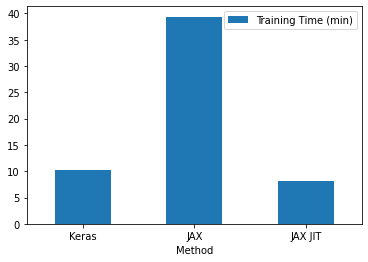

In [6]:
# batchsize1_table.plot.bar(x='Método', y='Tempo de Treinamento (min)', rot=0, title="Comparação dos Tempos de Treinamento para 40 épocas, com batch size = 1", color=["#1E90FF", "#BA55D3", "#4169E1"])
batchsize1_table.plot.bar(x='Method', y='Training Time (min)', rot=0)

In [7]:
batchsize1_table['Speedup'] = batchsize1_table["Tempo de Treinamento (min)"].apply(lambda t: (batchsize1_table.iloc[0]["Tempo de Treinamento (min)"]/t))

KeyError: 'Tempo de Treinamento (min)'

In [ ]:
batchsize1_table

,Método,Tempo de Treinamento (min),speedup
0,Keras,10.183333,1.000000
1,JAX,39.383333,0.258570
2,JAX JIT,8.166667,1.246939


In [11]:
batchsize4_table = pd.DataFrame({"Method": ["Manual", 
                                            "Manual JIT", 
                                            "VMAP", 
                                            "VMAP JIT", 
                                            "PMAP"], 
                                 "Training Time (min)": [min_secs_to_fraction_minutes("130m10s"), 
                                          min_secs_to_fraction_minutes("33m44s"), 
                                          min_secs_to_fraction_minutes("71m56s"), 
                                          min_secs_to_fraction_minutes("42m3s"), 
                                          min_secs_to_fraction_minutes("16m50s")]})

In [12]:
batchsize4_table

,Method,Training Time (min)
0,Manual,130.166667
1,Manual JIT,33.733333
2,VMAP,71.933333
3,VMAP JIT,42.050000
4,PMAP,16.833333


In [13]:
batchsize4_table.iloc[0]["Training Time (min)"]

130.16666666666666

In [15]:
batchsize4_table['speedup'] = batchsize4_table["Training Time (min)"].apply(lambda t: (batchsize4_table.iloc[0]["Training Time (min)"]/t))

In [16]:
batchsize4_table

,Method,Training Time (min),speedup
0,Manual,130.166667,1.000000
1,Manual JIT,33.733333,3.858696
2,VMAP,71.933333,1.809546
3,VMAP JIT,42.050000,3.095521
4,PMAP,16.833333,7.732673


<AxesSubplot:xlabel='Method'>

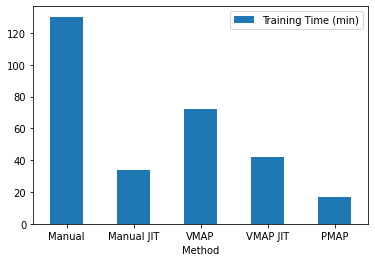

In [19]:
batchsize4_table.plot.bar(x='Method', y='Training Time (min)', rot=0)